In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv('data/IOTNET24_IDS.csv').drop('Unnamed: 0', axis=1)

data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,3.139211,0.0,0.0,S0,0,S,3,180,0,0,Benign
1,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
2,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
3,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149.0,128252.0,SF,2896,ShADadttcfF,94,5525,96,139044,Benign
4,192.168.1.195,41042,185.244.25.235,80,tcp,NaN,3.147116,0.0,0.0,S0,0,S,3,180,0,0,Benign


In [52]:
malicious_data = data[data['label'] != 'Benign']

malicious_data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
25,192.168.1.195,48986,185.244.25.235,6667,tcp,NaN,3.107733,0.0,0.0,S0,0,S,3,180,0,0,Malicious
48,192.168.1.195,48998,185.244.25.235,6667,tcp,NaN,3.097488,0.0,0.0,S0,0,S,3,180,0,0,Malicious
50,192.168.1.195,48998,185.244.25.235,6667,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Malicious
52,192.168.1.195,49004,185.244.25.235,6667,tcp,NaN,3.124484,0.0,0.0,S0,0,S,3,180,0,0,Malicious
54,192.168.1.195,49004,185.244.25.235,6667,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Malicious


In [55]:
benign_data = data[data['label'] == 'Benign']

benign_data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,3.139211,0.0,0.0,S0,0,S,3,180,0,0,Benign
1,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
2,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
3,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149.0,128252.0,SF,2896,ShADadttcfF,94,5525,96,139044,Benign
4,192.168.1.195,41042,185.244.25.235,80,tcp,NaN,3.147116,0.0,0.0,S0,0,S,3,180,0,0,Benign


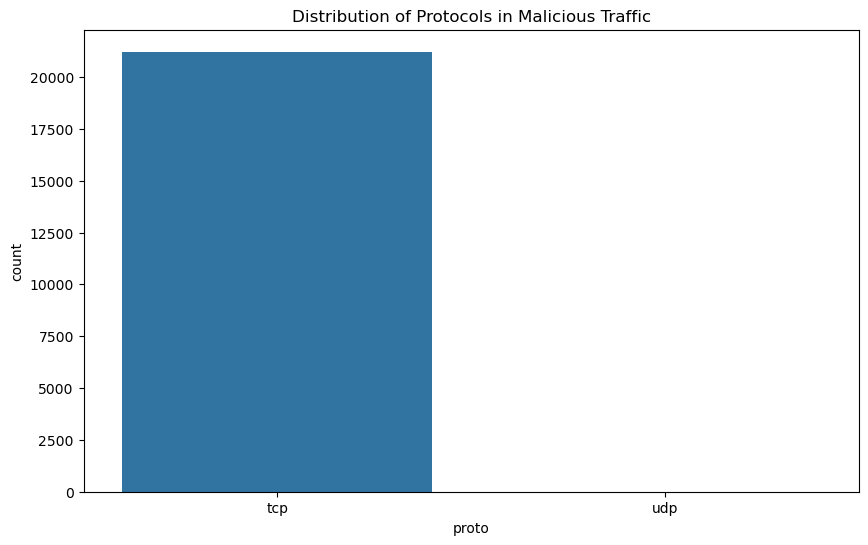

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(data=malicious_data, x='proto')
plt.title('Distribution of Protocols in Malicious Traffic')
plt.show()


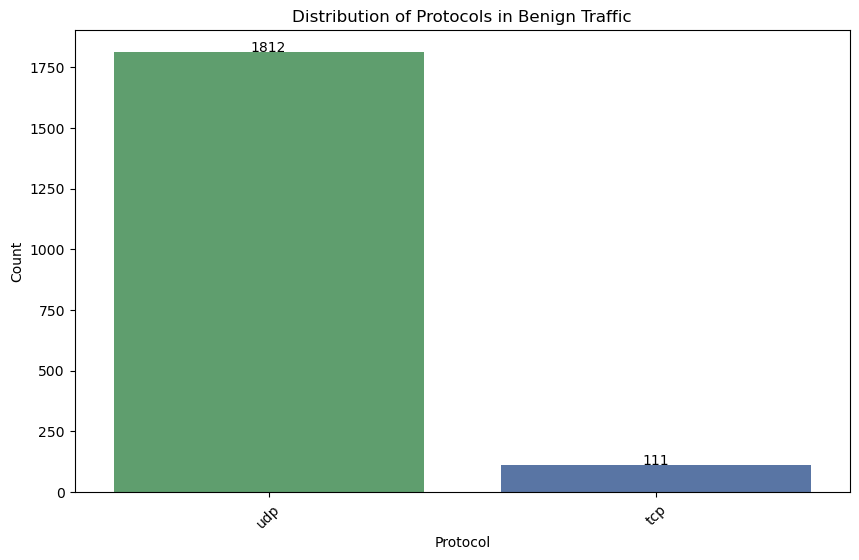

In [74]:
benign_proto_counts = benign_data['proto'].value_counts().reset_index()
benign_proto_counts.columns = ['proto', 'count_benign']

custom_colors = ['#55a868', '#4c72b0']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=benign_proto_counts, x='proto', y='count_benign', palette=custom_colors)
plt.title('Distribution of Protocols in Benign Traffic')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)

for index, row in benign_proto_counts.iterrows():
    ax.text(row.name, row['count_benign'], round(row['count_benign'], 2), color='black', ha="center")

plt.show()

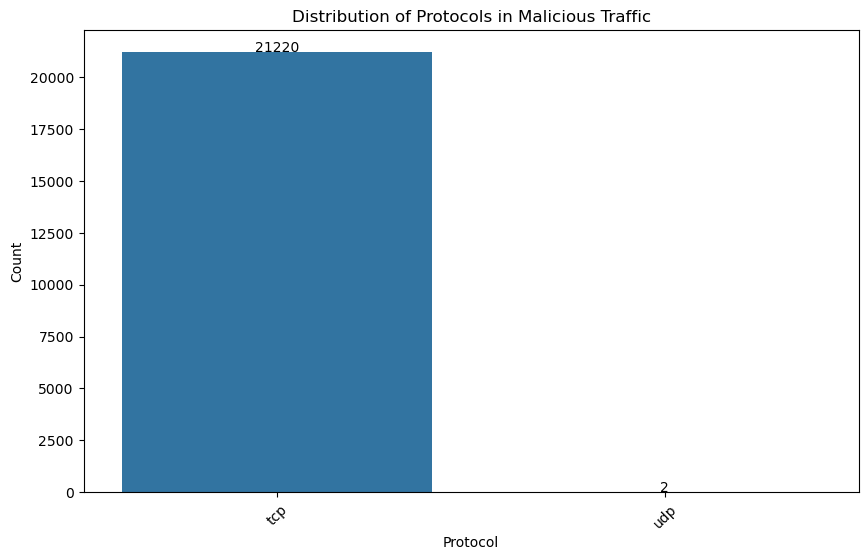

In [73]:
malicious_proto_counts = malicious_data['proto'].value_counts().reset_index()
malicious_proto_counts.columns = ['proto', 'count_malicious']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=malicious_proto_counts, x='proto', y='count_malicious')
plt.title('Distribution of Protocols in Malicious Traffic')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)

for index, row in malicious_proto_counts.iterrows():
    ax.text(row.name, row['count_malicious'], round(row['count_malicious'], 2), color='black', ha="center")

plt.show()

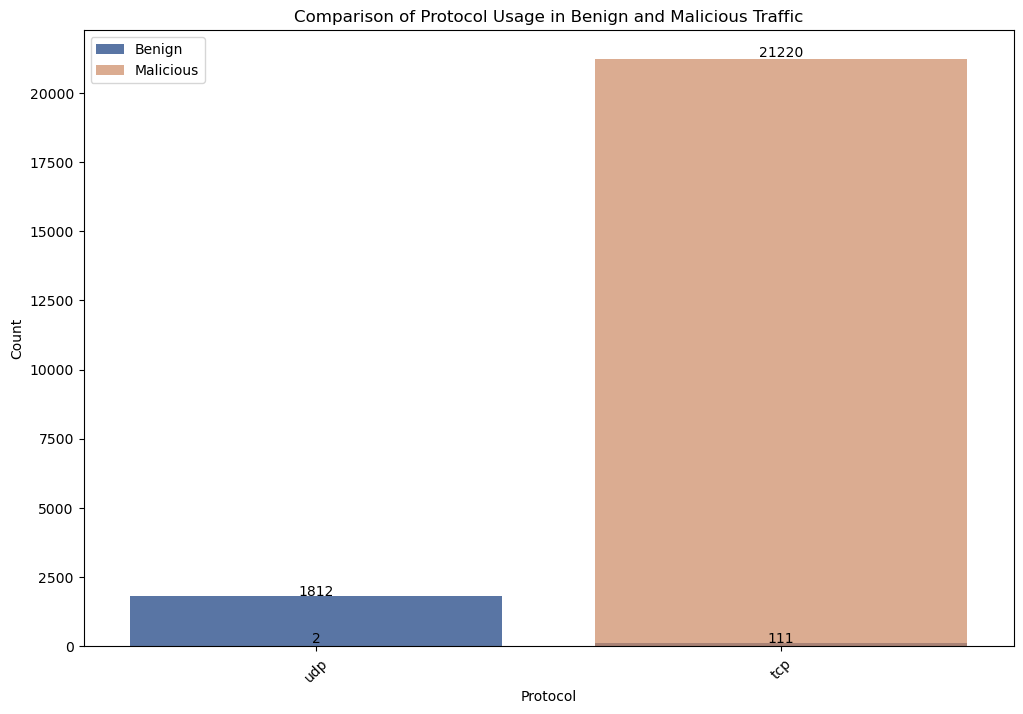

In [75]:
proto_counts = pd.merge(benign_proto_counts, malicious_proto_counts, on='proto', how='outer').fillna(0)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=proto_counts, x='proto', y='count_benign', color='#4c72b0', label='Benign')
ax = sns.barplot(data=proto_counts, x='proto', y='count_malicious', color='#dd8452', label='Malicious', alpha=0.7)

plt.title('Comparison of Protocol Usage in Benign and Malicious Traffic')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend()

plt.xticks(rotation=45)

for index, row in proto_counts.iterrows():
    ax.text(row.name, row['count_benign'], int(row['count_benign']), color='black', ha="center")
    ax.text(row.name, row['count_malicious'], int(row['count_malicious']), color='black', ha="center", va='bottom')

plt.show()

In [22]:
label = {'Malicious': 1,'Benign': 0}
data.label = [label[item] for item in data.label]

KeyError: 0

In [30]:
protocol = {'tcp': 1,'udp': 0}
data.proto = [protocol[item] for item in data.proto]

In [31]:
data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,192.168.1.195,41040,185.244.25.235,80,1,NaN,3.139211,0.0,0.0,S0,0,S,3,180,0,0,0
1,192.168.1.195,41040,185.244.25.235,80,1,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,0
2,192.168.1.195,41040,185.244.25.235,80,1,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,0
3,192.168.1.195,41040,185.244.25.235,80,1,http,1.477656,149.0,128252.0,SF,2896,ShADadttcfF,94,5525,96,139044,0
4,192.168.1.195,41042,185.244.25.235,80,1,NaN,3.147116,0.0,0.0,S0,0,S,3,180,0,0,0


In [37]:
cleaned = data.drop(['id.orig_h', 'id.resp_h', 'service', 'conn_state', 'history'], axis=1)
cleaned.head()


,id.orig_p,id.resp_p,proto,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,41040,80,1,3.139211,0.0,0.0,0,3,180,0,0,0
1,41040,80,1,NaN,NaN,NaN,0,1,60,0,0,0
2,41040,80,1,NaN,NaN,NaN,0,1,60,0,0,0
3,41040,80,1,1.477656,149.0,128252.0,2896,94,5525,96,139044,0
4,41042,80,1,3.147116,0.0,0.0,0,3,180,0,0,0


c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'id.orig_p'),
  Text(1.5, 0, 'id.resp_p'),
  Text(2.5, 0, 'proto'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'orig_bytes'),
  Text(5.5, 0, 'resp_bytes'),
  Text(6.5, 0, 'missed_bytes'),
  Text(7.5, 0, 'orig_pkts'),
  Text(8.5, 0, 'orig_ip_bytes'),
  Text(9.5, 0, 'resp_pkts'),
  Text(10.5, 0, 'resp_ip_bytes'),
  Text(11.5, 0, 'label')])

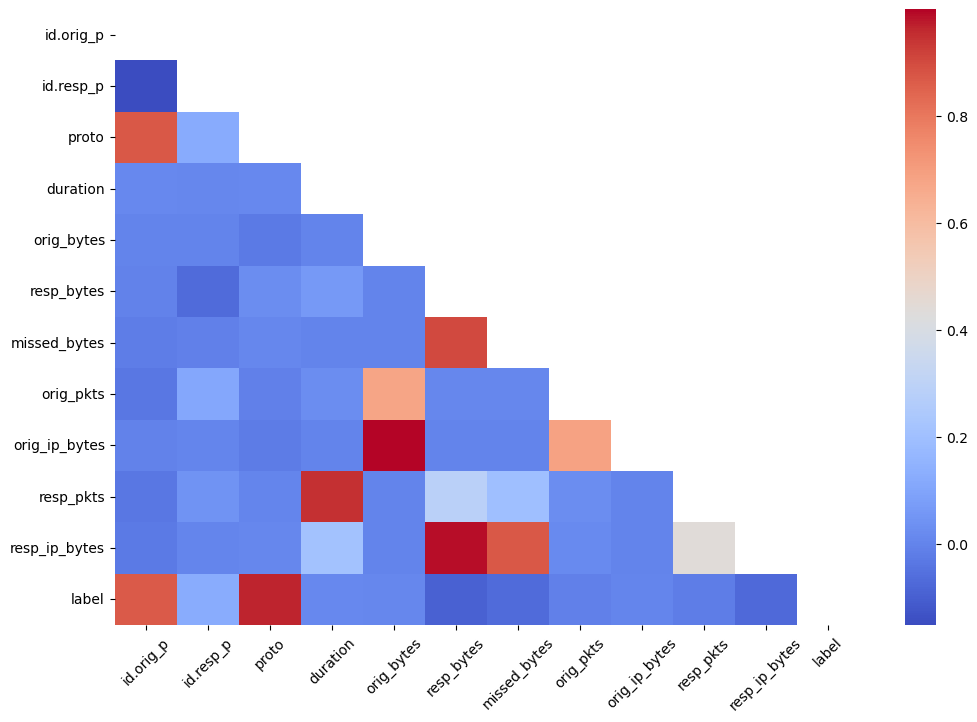

In [44]:
plt.figure(figsize=(12, 8))

corr = cleaned.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(cleaned.corr(), annot=True, mask=mask, cmap='coolwarm', fmt=".2f")

plt.xticks(rotation=45)

In [45]:
grouped = cleaned.groupby(['label', 'proto']).size().reset_index(name='count')

In [46]:
max_proto_counts = grouped.loc[grouped.groupby('label')['count'].idxmax()]

In [48]:
print(grouped)

   label  proto  count
0      0      0   1812
1      0      1    111
2      1      0      2
3      1      1  21220
